# Fauvet Field

**-Reference:** [Fauvet et al. (2012)](https://arxiv.org/abs/1201.5742) 

**-Original Implementation:** Hammurabi (old) [(code](https://sourceforge.net/projects/hammurabicode/), [paper)](https://arxiv.org/abs/0807.2262)

**-Default parameters constrained using (see reference publication):** *simulated* Planck data -> no real data used

In [16]:
import ImagineModels as img
from plotting_helpers import plot_slice


#### 1. Visualizing the model

In [17]:
model = img.FauvetMagneticField()
shape = [200, 200, 40] # necessarily a list of 3 ints! 
increment = [.20, .20, .20]  
refpoint = [-20., -20., -4.]
vmax = 5
vmin = -5 

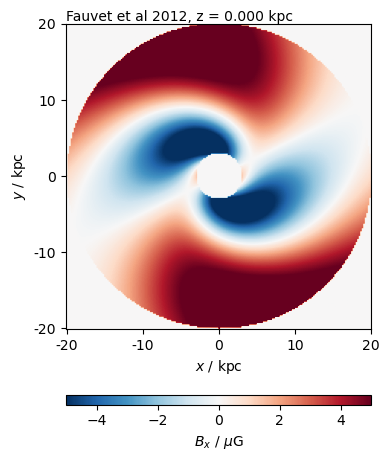

In [18]:
model_on_grid = model.on_grid(shape=shape, reference_point=refpoint, increment=increment)
plot_slice(model_on_grid, 0, 2, shape, refpoint, increment, vmin, vmax, field_name='Fauvet et al 2012')

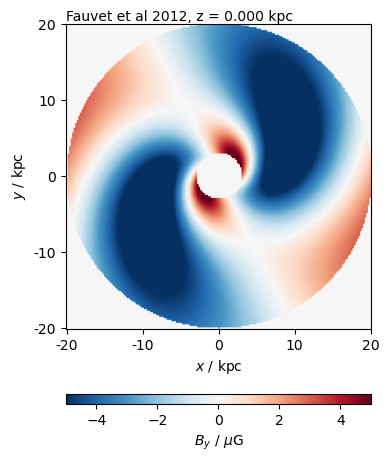

In [19]:
plot_slice(model_on_grid, 1, 2, shape, refpoint, increment, vmin, vmax, field_name='Fauvet et al 2012')

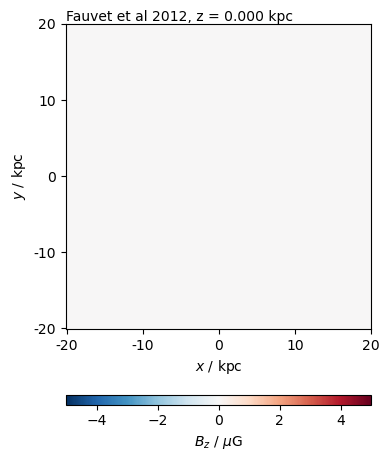

In [20]:
plot_slice(model_on_grid, 2, 2, shape, refpoint, increment, vmin, vmax, field_name='Fauvet et al 2012')
# Bz is zero in plane, but not in halo, see below.

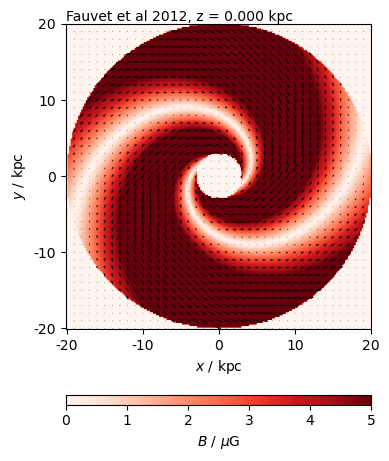

In [24]:
plot_slice(model_on_grid, 3, 2, shape, refpoint, increment, vmin, vmax, field_name='Fauvet et al 2012', quiver=True)

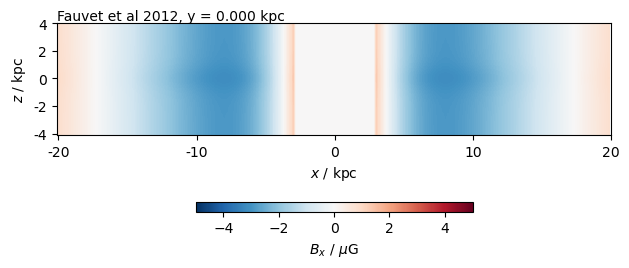

In [25]:
plot_slice(model_on_grid, 0, 1, shape, refpoint, increment, vmin, vmax, field_name='Fauvet et al 2012')

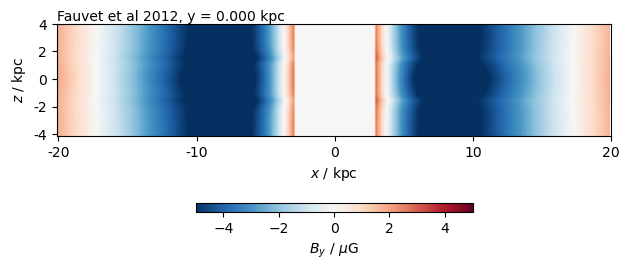

In [26]:
plot_slice(model_on_grid, 1, 1, shape, refpoint, increment, vmin, vmax, field_name='Fauvet et al 2012')

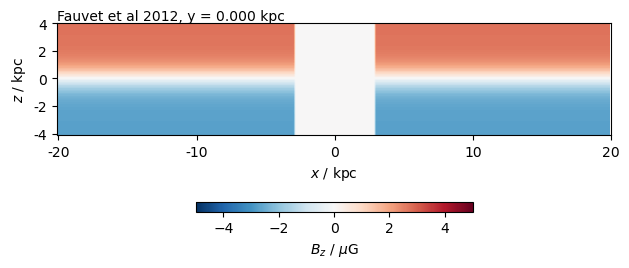

In [27]:
plot_slice(model_on_grid, 2, 1, shape, refpoint, increment, vmin, vmax, field_name='Fauvet et al 2012')

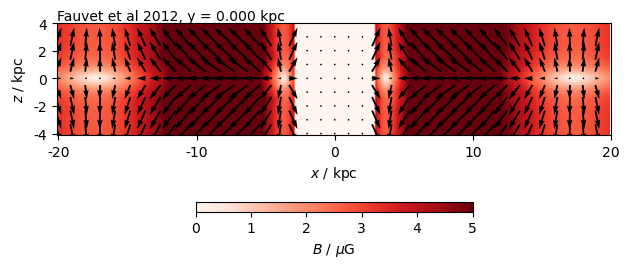

In [29]:
plot_slice(model_on_grid, 3, 1, shape, refpoint, increment, vmin, vmax, field_name='Fauvet et al 2012', quiver=True)

### 2. The parameters

**TBD**